## GRIP TASK: Spark Foundation-April 2023 (Data Science and Business Analytics Intern)
## Name: Pranshu Singh
Task 6: Prediction using Decision Tree Algorithm

> In this task, we have to create the Decision Tree classifier and visualize it graphically using the Iris - dataset. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Steps:

* 1 - Importing the dataset
* 2 - Preparing Data
* 3 - Visualizing the dataset
* 4 - Decision Tree Model Training
* 5 - Visualizing Decision Tree

### 1 - Importing the dataset

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


import warnings as wg
wg.filterwarnings("ignore")

In [125]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['Species'] = iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2 - Preparing data

In [127]:
data.duplicated().sum()

1

In [128]:
data.drop_duplicates().shape

(149, 5)

In [131]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [132]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###  3 - Visualizing the dataset

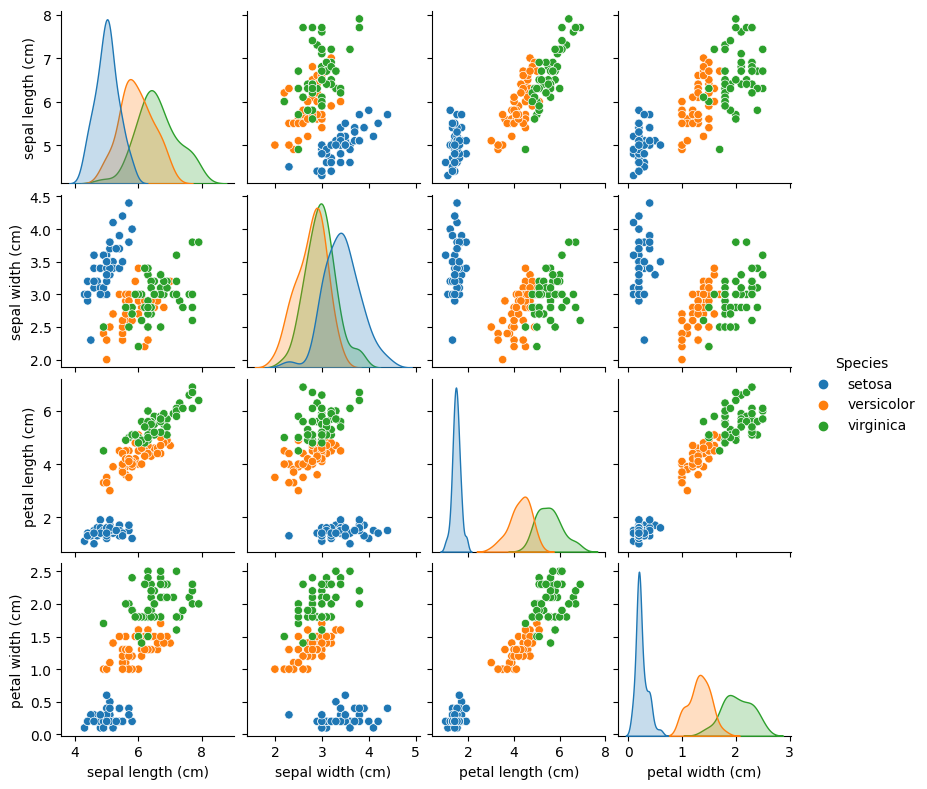

In [151]:
sns.pairplot(data, hue='Species', height=2)
plt.show()

> From the above pairplot we have relational graph of:
* Petal Width Vs Petal Length
* Sepal Width Vs Sepal Length

> Where:
* Blue - denotes Setosa
* orange - denotes Versicolor
* Green - denotes Virginica


<Axes: xlabel='Species', ylabel='count'>

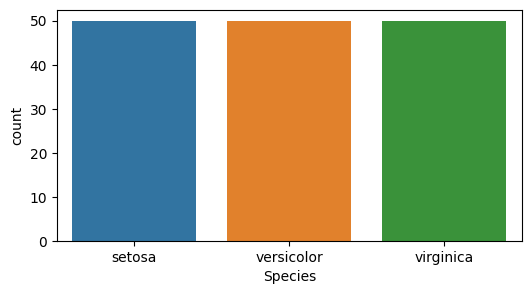

In [142]:
plt.figure(figsize = (6,3))
sns.countplot(x = data['Species'])

### 4 - Decision Tree Model Training

In [122]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:4], data.iloc[:,-1], test_size=0.2, random_state=50) 
DTree = DecisionTreeClassifier()
DTree.fit(x_train,y_train)
print("Training Complete.")
y_pred = DTree.predict(x_test)

Training Complete.


In [123]:
DTree.score(x_train,y_train)

1.0

> As, training set is taken 20% of total datadet. So, the score of training dataset will be 1.

In [119]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df.head(10)

,Actual,Predicted
88,versicolor,versicolor
72,versicolor,versicolor
20,setosa,setosa
16,setosa,setosa
147,virginica,virginica
140,virginica,virginica
113,virginica,virginica
23,setosa,setosa
12,setosa,setosa
68,versicolor,versicolor


<Axes: >

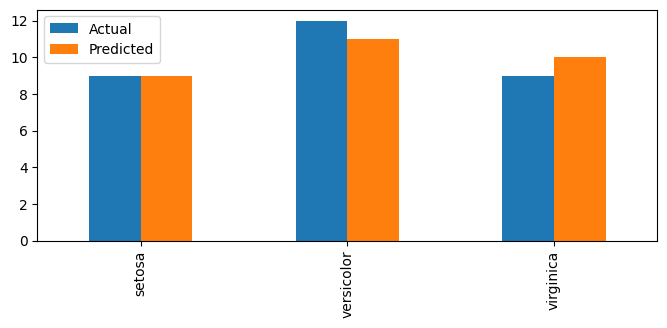

In [162]:
plt.rcParams["figure.figsize"] = [8,3]
dataf = pd.DataFrame({'Actual' : df['Actual'].value_counts(), 'Predicted' : df['Predicted'].value_counts()})
dataf.plot(kind = 'bar')

> Above bar plot shows, actual and predicted values for the given test dataset.

### 5 - Visualizing Decision Tree

[Text(0.4, 0.9166666666666666, 'Petal Length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]\nclass = setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'Petal Width (cm) <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]\nclass = virginica'),
 Text(0.2, 0.5833333333333334, 'Petal Length (cm) <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'Petal Width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.25, 'Sepal Length (cm) <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.5, 0.08333333333333333,

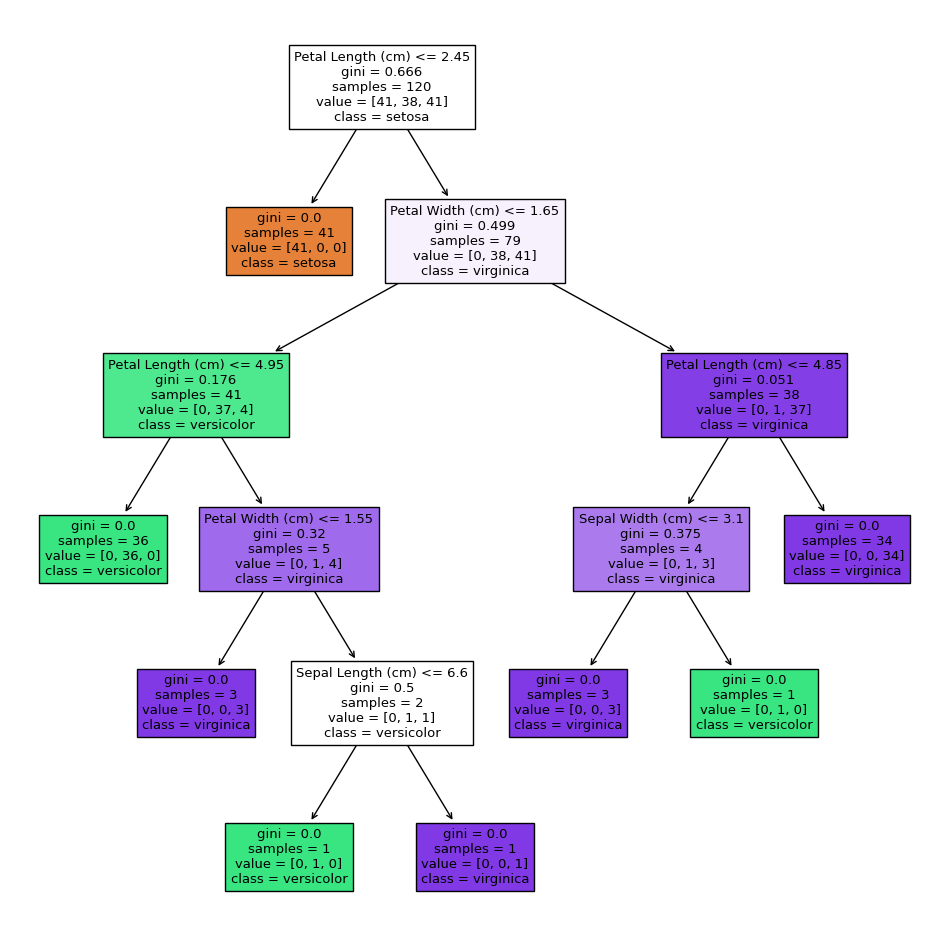

In [163]:

plt.figure(figsize=(12,12))
Features_Name = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)']
Class_Name = ['setosa','versicolor','virginica']
plot_tree(DTree,feature_names = Features_Name,class_names=Class_Name,filled = True)


> Above, we have trained decision tree model which is generated by using the test data.

In [164]:
print('Predicting with random test data: ',DTree.predict([[4.7, 3.2, 1.3, 0.2]]))

Predicting with random test data:  ['setosa']


> According the above prediction, our model was successfully able to predict a new random data's Species.

In [121]:
DTree.score(x_test,y_test)

0.9666666666666667

> The above score says that our model is successfully able to predict the Species with 96.67% prediction data sccuracy.

### Conclusion:
The DecisionTreeClassifier() trained model was successfully able to predict Species of the given dataset "Iris" and was able to evaluate the model's accuracy score with 96.67% accuracy.

## Thank you!